# Import needed libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

modules loaded


# Data Preprocessing

### Read data

In [2]:
df = pd.read_csv('/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv', encoding='ISO-8859-1')

# Check the first few rows of the dataset
print(df.head())

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

### Drop unneeded columns

In [3]:
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

### Define X and y

In [4]:
X = df.drop('car purchase amount', axis=1)
y = df['car purchase amount']

### Data Scaling

In [5]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

### Data Splitting

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 4)
(400, 1)
(100, 4)
(100, 1)


# Model Structure

In [7]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=4))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [8]:
history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2)

Epoch 1/1000
10/10 [==============================] - 2s 24ms/step - loss: 0.1862 - val_loss: 0.1608
Epoch 2/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.1171 - val_loss: 0.1015
Epoch 3/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0720 - val_loss: 0.0629
Epoch 4/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0440 - val_loss: 0.0381
Epoch 5/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0267 - val_loss: 0.0238
Epoch 6/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0171 - val_loss: 0.0158
Epoch 7/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.0118
Epoch 8/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0096 - val_loss: 0.0103
Epoch 9/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0091 - val_loss: 0.0098
Epoch 10/1000
10/10 [==============================] - 0s 6ms/step - loss: 0.0087 - val_loss: 0.009

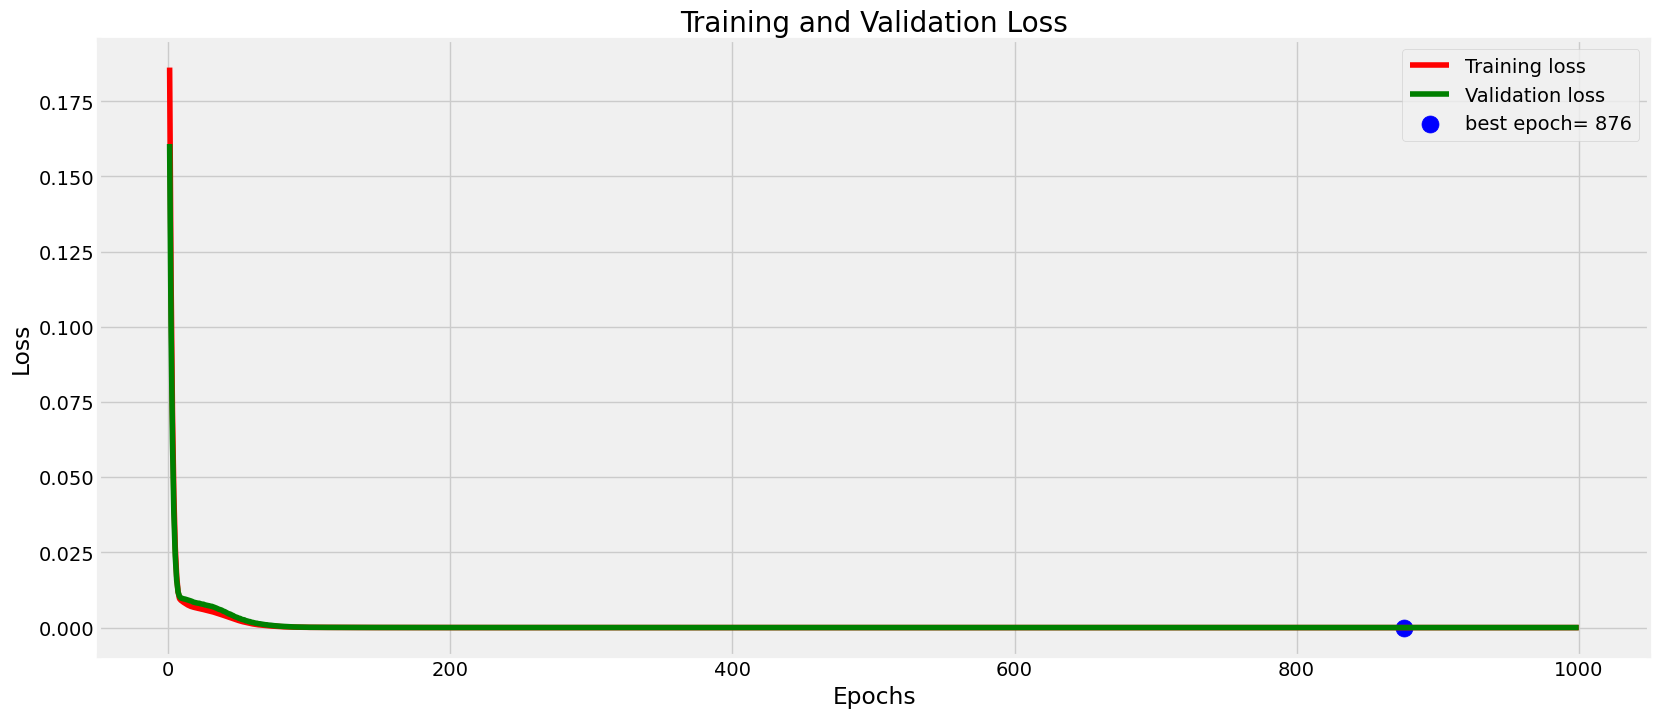

In [9]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

# Prediction

In [10]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [11]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )

R2 Score= 0.999989522533298
